## 1. Quadratic formula.


In [ ]:
import sys
import matplotlib.pyplot as plt

In [ ]:
def quadratic_equation(r,x):
    return r * x * (1.0-x)

def run_sim(input1: float=0.3501, input2: float=0.35):
    r = 3.7
    plt.suptitle("r = {}".format(r), size=16)

    tims, vals = valsByTime(r, input1, 50)
    plt.plot(tims, vals, 'r')

    tims, vals = valsByTime(r, input2, 50)
    plt.plot(tims, vals, 'b')
    plt.show()

def valsByTime(r, x, nSteps):
    tims = range(nSteps)
    vals = []
    for i in tims :
        xp = quadratic_equation(r,x)
        vals.append(xp)
        x = xp
    return tims, vals

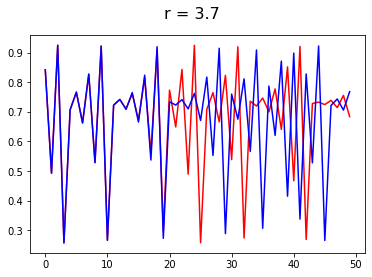

In [ ]:
run_sim(0.3501, 0.35) # small changes in input result in broad changes in output

## 2. Creating 'recurrence plot' for random, periodic oraz chaotic data.

### A recurrence is a time the trajectory returns to a location it has visited before. The recurrence plot depicts the collection of pairs of times at which the trajectory is at the same place.

### Recurrence plot for random data (gaussian noise).

In [ ]:
import matplotlib.pyplot as plt
# !pip install pyts
from pyts.image import RecurrencePlot
import numpy as np

In [ ]:
def rec_plot(data):
  # Recurrence plot transformation
  rp = RecurrencePlot(threshold='point', percentage=20)
  data = rp.fit_transform(data)

  # Show the results for the first time series
  plt.figure(figsize=(5, 5))
  plt.imshow(data[0], cmap='binary', origin='lower')
  plt.title('Recurrence Plot', fontsize=16)
  plt.tight_layout()
  plt.show()

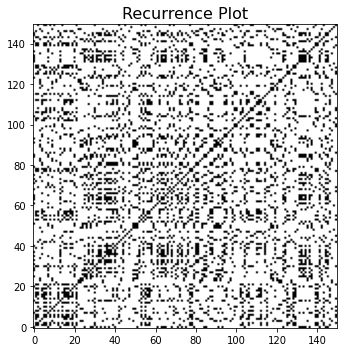

In [ ]:
gaussian_noise = np.random.normal(loc=0, scale=1, size=(50,150))  # 2.3, 1.8
rec_plot(gaussian_noise)

### Recurrence plot for periodic data.
### if the trajectory is strictly periodic with period $T$, then all pairs of times will be separated by a multiple of $T$.

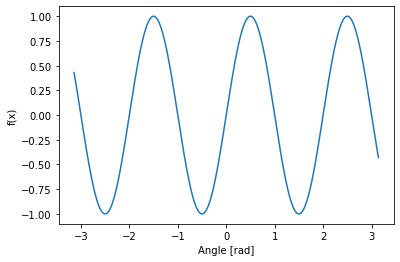

In [ ]:
# ----- INPUT TRAJECTORY -----
x = np.linspace(-1*np.pi, 1*np.pi, 50*150)
# plt.plot(x, 0.5*np.sin(x)+2*np.cos(x)+0.3-np.sin(0.3*x))
plt.xlabel('Angle [rad]')
plt.ylabel('f(x)')
plt.plot(x, np.sin(x * np.pi))
plt.show()

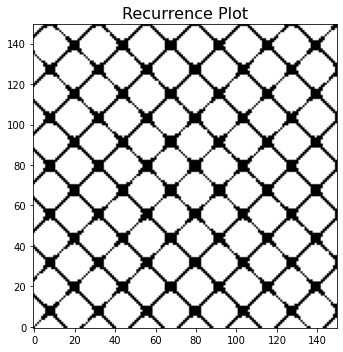

In [ ]:
# ----- RECURRENCE PLOT -----
X = np.reshape(np.linspace(-100*np.pi, 100*np.pi, 50*150), (50,150))
# Y = 0.5*np.sin(X)+2*np.cos(X)+0.3-np.sin(0.3*X)
Y = np.sin(X * np.pi)
rec_plot(Y)

### Recurrence plot for chaotic data.

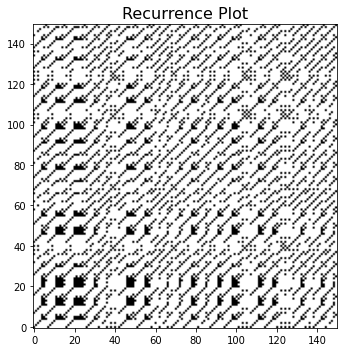

In [ ]:
# ----- RECURRENCE PLOT -----
# def quadratic_eq(r,x_array):
#     return [r * x * (1.0-x) for x in x_array]
X = np.reshape(np.linspace(-100, 100, 50*150), (50,150))
_, Y = valsByTime(3.7, 0.35, 50*150)
Y = np.reshape(Y, (50,150))
rec_plot(Y)